### Top 1000 filmes IMDB
#### Algoritmo com tabela comparativa dos valores de predição em relação aos valores reais ocorridos.

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/drisabelles/aprendizagem-maquina/main/imdb_top_1000.csv'
df = pd.read_csv(url, sep = ',')
df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [4]:
df['Genre'] = df['Genre'].str.split(',')

In [5]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,[Drama],9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"[Crime, Drama]",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"[Action, Crime, Drama]",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"[Crime, Drama]",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"[Crime, Drama]",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [6]:
df_genres = pd.DataFrame(df['Genre'].tolist()).fillna('').add_prefix('Genre_')

In [7]:
df = pd.concat([df, df_genres], axis=1)

In [8]:
df = df.loc[:,~df.columns.duplicated()].copy()
df[['Series_Title', 'Released_Year', 'Runtime', 'Director', 'Genre_1', 'Genre_2']]

,Series_Title,Released_Year,Runtime,Director,Genre_1,Genre_2
0,The Shawshank Redemption,1994,142 min,Frank Darabont,,
1,The Godfather,1972,175 min,Francis Ford Coppola,Drama,
2,The Dark Knight,2008,152 min,Christopher Nolan,Crime,Drama
3,The Godfather: Part II,1974,202 min,Francis Ford Coppola,Drama,
4,12 Angry Men,1957,96 min,Sidney Lumet,Drama,
...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115 min,Blake Edwards,Drama,Romance
996,Giant,1956,201 min,George Stevens,Western,
997,From Here to Eternity,1953,118 min,Fred Zinnemann,Romance,War
998,Lifeboat,1944,97 min,Alfred Hitchcock,War,


In [9]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
Genre_0           object
Genre_1           object
Genre_2           object
dtype: object

In [10]:
df_clean = df.drop(['Poster_Link', 'Certificate', 'Overview', 'Genre', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'], axis=1)
df_clean.replace('-', 'Unknown', inplace=True)
df_clean.replace(True, 1, inplace=True)
df_clean.replace(False, 0, inplace=True)
df_clean.head(5)

,Series_Title,Released_Year,Runtime,IMDB_Rating,Meta_score,Director,Genre_0,Genre_1,Genre_2
0,The Shawshank Redemption,1994,142 min,9.3,80.0,Frank Darabont,Drama,,
1,The Godfather,1972,175 min,9.2,100.0,Francis Ford Coppola,Crime,Drama,
2,The Dark Knight,2008,152 min,9.0,84.0,Christopher Nolan,Action,Crime,Drama
3,The Godfather: Part II,1974,202 min,9.0,90.0,Francis Ford Coppola,Crime,Drama,
4,12 Angry Men,1957,96 min,9.0,96.0,Sidney Lumet,Crime,Drama,


In [15]:
x = df_clean.drop(['Genre_0'], axis=1)
y = df_clean['Genre_0']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
# Verifica se existem valores nulos
print(df_clean.isnull().sum())

Series_Title       0
Released_Year      0
Runtime            0
IMDB_Rating        0
Meta_score       157
Director           0
Genre_0            0
Genre_1            0
Genre_2            0
dtype: int64


In [18]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.0 MB/s eta 0:00:00


In [19]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import numpy as np

categorical_features_indices = np.where(x.dtypes != float)[0]

print(categorical_features_indices)

[0 1 2 5 6 7]


In [20]:
model = CatBoostClassifier(
    custom_loss=[metrics.Precision()],
    random_seed=42,
    logging_level='Silent'
)

model.fit(
    x_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(x_test, y_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Acurácia: 0.69
Precision: 0.68
Matriz de Confusão


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


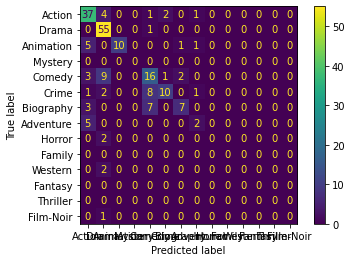

In [21]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model.predict(x_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

# Precision
pre = precision_score(y_test, y_pred, average = 'weighted')
print("Precision: {:.2f}".format(pre))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=y_train.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
disp.plot()